In [1]:
!pip install kaggle

In [2]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:

!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3665.jpg', 'with_mask_2620.jpg', 'with_mask_361.jpg', 'with_mask_1572.jpg', 'with_mask_1786.jpg']
['with_mask_2976.jpg', 'with_mask_1916.jpg', 'with_mask_1509.jpg', 'with_mask_3368.jpg', 'with_mask_695.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3057.jpg', 'without_mask_2386.jpg', 'without_mask_1346.jpg', 'without_mask_460.jpg', 'without_mask_2569.jpg']
['without_mask_1418.jpg', 'without_mask_3158.jpg', 'without_mask_2107.jpg', 'without_mask_2767.jpg', 'without_mask_2431.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [9]:

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:

X = np.array(data)
Y = np.array(labels)

In [15]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [18]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [19]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models


In [21]:
num_of_classes = 2

# model = keras.Sequential()

# model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


# model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(keras.layers.Flatten())

# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dropout(0.5))

# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dropout(0.5))


# model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(layers.Flatten())

# Fully Connected Layer 1
model.add(layers.Dense(128, activation='relu'))

# Output Layer
model.add(layers.Dense(num_of_classes, activation='sigmoid'))

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [23]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 17s 22ms/step - loss: 0.3800 - acc: 0.8389 - val_loss: 0.2964 - val_acc: 0.8777
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2127 - acc: 0.9130 - val_loss: 0.2037 - val_acc: 0.9256
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1380 - acc: 0.9463 - val_loss: 0.2596 - val_acc: 0.9273
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.0905 - acc: 0.9676 - val_loss: 0.2572 - val_acc: 0.9223
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.0611 - acc: 0.9776 - val_loss: 0.3051 - val_acc: 0.9174


In [24]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2681 - acc: 0.9239
Test Accuracy = 0.9238914847373962


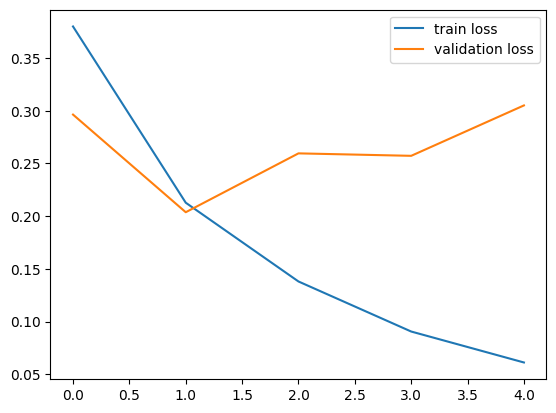

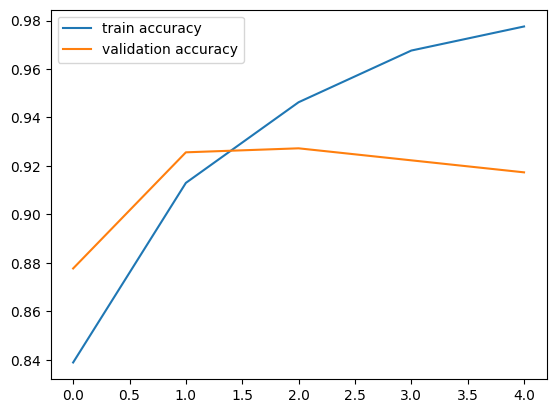

In [25]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/mask.jfif


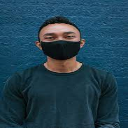

1/1 [==============================] - 0s 29ms/step
[[0.559845   0.25401902]]
0
The person in the image is not wearing a mask


In [27]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)



input_image_resized = cv2.resize(input_image, (128,128))
cv2_imshow(input_image_resized)
input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')